In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data = data[data['CustomerID'].notnull()]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [7]:
dt.timedelta(1)


datetime.timedelta(days=1)

In [8]:
pin_date = max(data['InvoiceDay']) + dt.timedelta(1)
pin_date

Timestamp('2011-12-10 00:00:00')

In [9]:
data['TotalSum'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [10]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDay': lambda x: (pin_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})
rfm

,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [11]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,-77183.6


In [12]:
rfm.rename(columns= {
    'InvoiceDay': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [13]:
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [14]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [15]:
X = rfm[['R', 'F', 'M']]
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=5)

In [16]:
kmeans.labels_

array([2, 4, 0, ..., 3, 4, 4], dtype=int32)

In [17]:
rfm['kmeans_cluster'] = kmeans.labels_
rfm

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,2
12347.0,3,182,4310.00,4,4,4,4
12348.0,76,31,1797.24,2,2,4,0
12349.0,19,73,1757.55,3,3,4,4
12350.0,311,17,334.40,1,1,2,2
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,2
18281.0,181,7,80.82,1,1,1,2
18282.0,8,13,176.60,4,1,1,3


In [18]:
print(rfm[rfm['kmeans_cluster'] == 4])

rfm[rfm['kmeans_cluster'] == 4].mean()

            Recency  Frequency  Monetary  R  F  M  kmeans_cluster
CustomerID                                                       
12347.0           3        182   4310.00  4  4  4               4
12349.0          19         73   1757.55  3  3  4               4
12356.0          23         59   2811.43  3  3  4               4
12357.0          34        131   6207.67  3  4  4               4
12359.0           8        254   6245.53  4  4  4               4
...             ...        ...       ... .. .. ..             ...
18245.0           8        177   2507.56  4  4  4               4
18257.0          40        123   2265.38  3  4  4               4
18272.0           3        170   3064.78  4  4  4               4
18283.0           4        756   2094.88  4  4  4               4
18287.0          43         70   1837.28  3  3  4               4

[1094 rows x 7 columns]


/var/folders/hm/p98n6gdd593b48mpq4stl_sh0000gn/T/ipykernel_21116/2781446631.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rfm[rfm['kmeans_cluster'] == 4].mean()


Recency             21.622486
Frequency          260.085009
Monetary          5653.683556
kmeans_cluster       4.000000
dtype: float64

In [19]:
rfm.mean()

/var/folders/hm/p98n6gdd593b48mpq4stl_sh0000gn/T/ipykernel_21116/1356782425.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rfm.mean()


Recency             92.581199
Frequency           93.053294
Monetary          1898.459701
kmeans_cluster       2.191903
dtype: float64

In [20]:
kmeans.inertia_

3746.6226553317047

<AxesSubplot:>

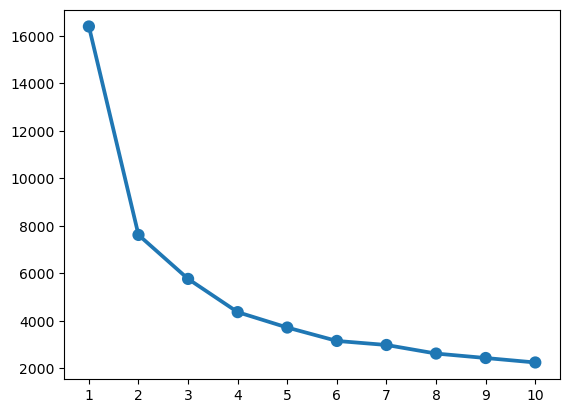

In [21]:
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))

In [22]:
x= data[['Description']]
X.head()

,R,F,M
CustomerID,,,
12346.0,1,1,1
12347.0,4,4,4
12348.0,2,2,4
12349.0,3,3,4
12350.0,1,1,2


In [60]:
customer_recommendations = {}

cluster_data = rfm[rfm['kmeans_cluster'] == 4]
customer_product = list(data[data['CustomerID']==12347.0]['Description'])

customers_without_product = data[~data['Description'].isin(customer_product)]
customers_without_product = customers_without_product[customers_without_product['CustomerID'].isin(cluster_data.index)]

for customer_id in customers_without_product['CustomerID'].unique():
    if customer_id not in customer_recommendations:
        customer_recommendations[customer_id] = []
    customer_product_unique = list(customers_without_product[
        (customers_without_product['CustomerID']==customer_id)&
        (customers_without_product['Description'].isin(customer_product))]['Description'])
    recomm = list(set(customer_product)-set(customer_product_unique))
    customer_recommendations[customer_id].append(recomm)
f= open("recomendation.txt","w+")
for customer_id, product in customer_recommendations.items():
     f.write(f"customer: {customer_id}, recommended_products: {product}")
f.close()